In [115]:
# Data manipulation and analysis
import pandas as pd          # For data manipulation and analysis
import numpy as np           # For numerical operations

# Data visualization
import matplotlib.pyplot as plt  # For plotting data
import seaborn as sns            # For enhanced data visualization

# Scikit-learn for machine learning
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.linear_model import LinearRegression     # For linear regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # For model evaluation
from sklearn.preprocessing import LabelEncoder
# Optional: If you need to scale the data (e.g., standardize features)
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("D:/pythonprojects/data/train.csv")

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


RL: Residential Low Density
RM: Residential Medium Density
FV: Floating Village Residential
RH: Residential High Density
C (all): Commercia

In [116]:
df["MSZoning"] = {}

In [117]:
# Drop columns with too many missing values or irrelevant information
df.drop(['Alley', 'PoolQC', 'MiscFeature',"Fence"],axis = 1,inplace= True)
print(df.isnull().sum())
print(df.head())

Id                  0
MSSubClass          0
MSZoning         1460
LotFrontage       259
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 77, dtype: int64
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60      NaN         65.0     8450   Pave      Reg         Lvl   
1   2          20      NaN         80.0     9600   Pave      Reg         Lvl   
2   3          60      NaN         68.0    11250   Pave      IR1         Lvl   
3   4          70      NaN         60.0     9550   Pave      IR1         Lvl   
4   5          60      NaN         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ... 

In [118]:
zoning_types = df["MSZoning"].unique()
zoning_types

array([nan], dtype=object)

In [119]:
lot = df["LotFrontage"]
# Inspect the column and check for missing values
print(df['LotFrontage'].describe())
print(df['LotFrontage'].isnull().sum())
df['SalePrice'].fillna(0, inplace=True)  
df.fillna(0,inplace=True)

# Example: Impute missing values with the median
df["SalePrice"].fillna(df["SalePrice"].median(),inplace= True)
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
lot = df["LotFrontage"].isnull().sum()
print(lot)

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
259
0


C:\Users\ankus\AppData\Local\Temp\ipykernel_8596\2924934282.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SalePrice'].fillna(0, inplace=True)
C:\Users\ankus\AppData\Local\Temp\ipykernel_8596\2924934282.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(0,inplace=True)
C:\Users\ankus\AppData

In [120]:
print(df["LotArea"].describe(),df["LotArea"].head())



count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64 0     8450
1     9600
2    11250
3     9550
4    14260
Name: LotArea, dtype: int64


In [121]:
street_types = df["Street"].unique()
print(street_types)



['Pave' 'Grvl']


In [122]:
print(df.columns.tolist())

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSol

In [123]:
# selected_columns = df[["Utilities","LotConfig","LandSlope","Neighborhood","Condition1","Condition2",
#                        "BldgType","HouseStyle"]]
# print(selected_columns.drop_duplicates())

print(
    f"LandContour: {df['LandContour'].unique()}\n"
    f"Street: {df['Street'].unique()}\n"
    f"LotShape: {df['LotShape'].unique()}\n"
    
    f"Utilities: {df['Utilities'].unique()}\n"
    f"LotConfig: {df['LotConfig'].unique()}\n"
    f"LandSlope: {df['LandSlope'].unique()}\n"
    f"Neighborhood: {df['Neighborhood'].unique()}\n"
    f"Condition1: {df['Condition1'].unique()}\n"
    f"Condition2: {df['Condition2'].unique()}\n"
    f"BldgType: {df['BldgType'].unique()}\n"
    f"HouseStyle: {df['HouseStyle'].unique()}"
)

# Convert the entire DataFrame to numeric, setting invalid parsing as NaN
df = df.map(lambda x: pd.to_numeric(x, errors='coerce'))
df.fillna(0, inplace=True)


LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
Street: ['Pave' 'Grvl']
LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
Utilities: ['AllPub' 'NoSeWa']
LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope: ['Gtl' 'Mod' 'Sev']
Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']


In [124]:
#functin for label encoder
def label(df):
    label_encoder = LabelEncoder()  
    object_columns = df.select_dtypes(include=['object']).columns
    
    for column in object_columns:
        df[column] = label_encoder.fit_transform(df[column])
    
    return df  


dictionary mapping

In [125]:
def encode_columns(df):
    column_mappings = {}
    
    object_columns = df.select_dtypes(include=['object']).columns
    for column in object_columns:
        
        label_encoder = LabelEncoder()
        df[column] = label_encoder.fit_transform(df[column])
        #dictionary mapping
        column_mappings[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    
    for column, mapping in column_mappings.items():
        print(f"{column} Mapping:")
        for key, value in mapping.items():
            print(f"  {key}: {value}")
        print()  



In [126]:
encode_columns(df)

correlation heatmap

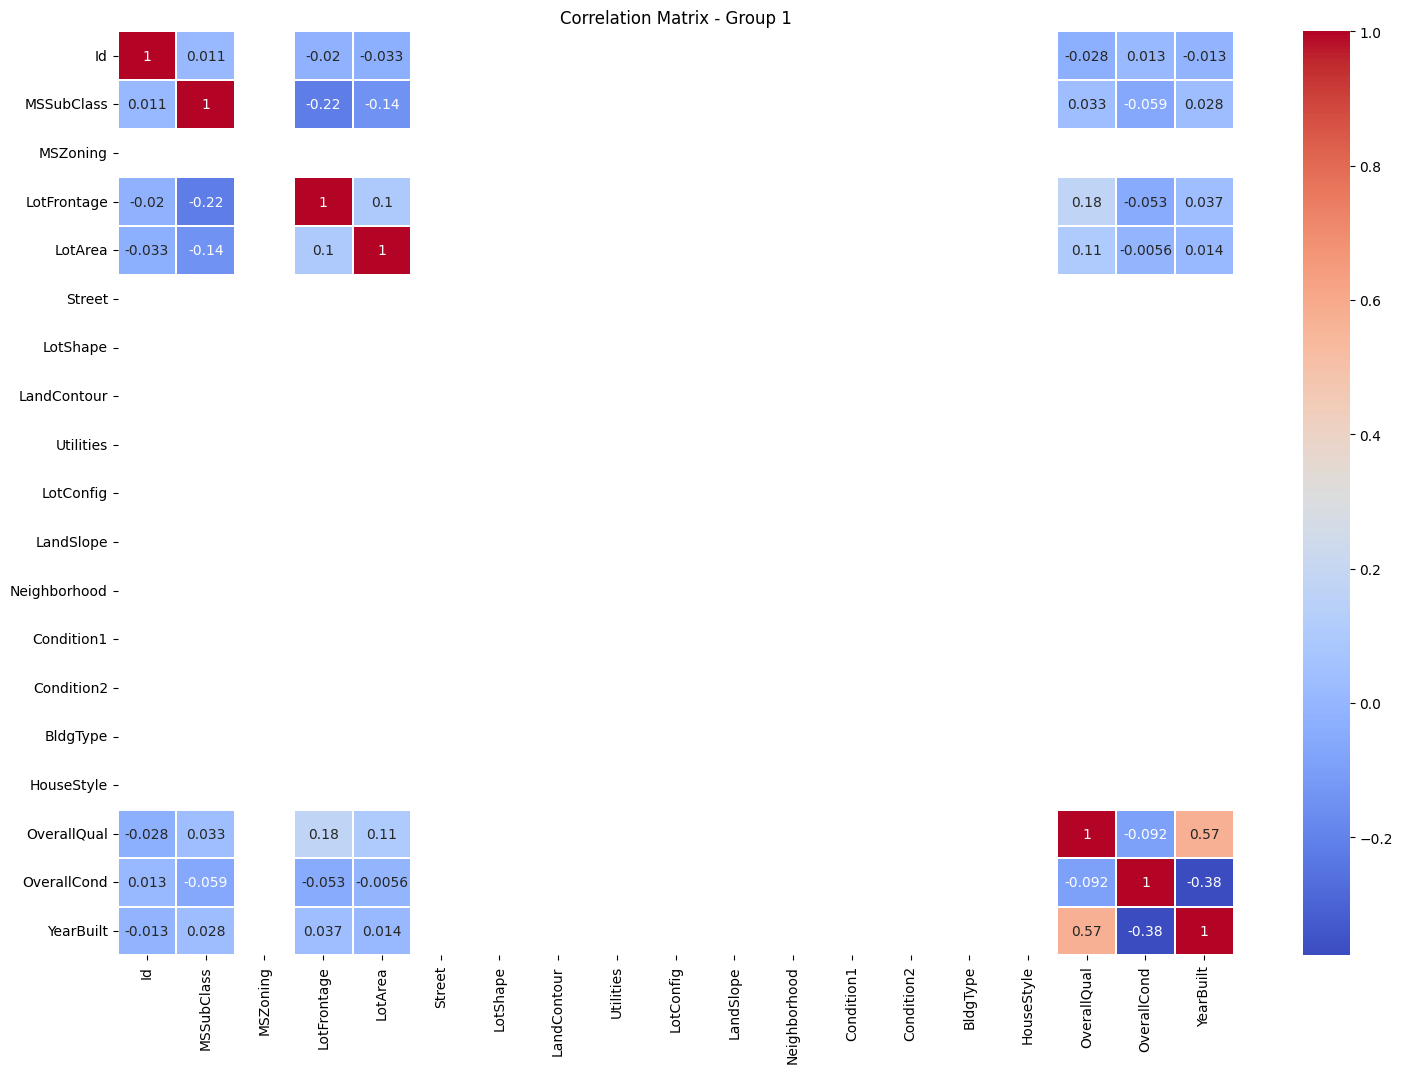

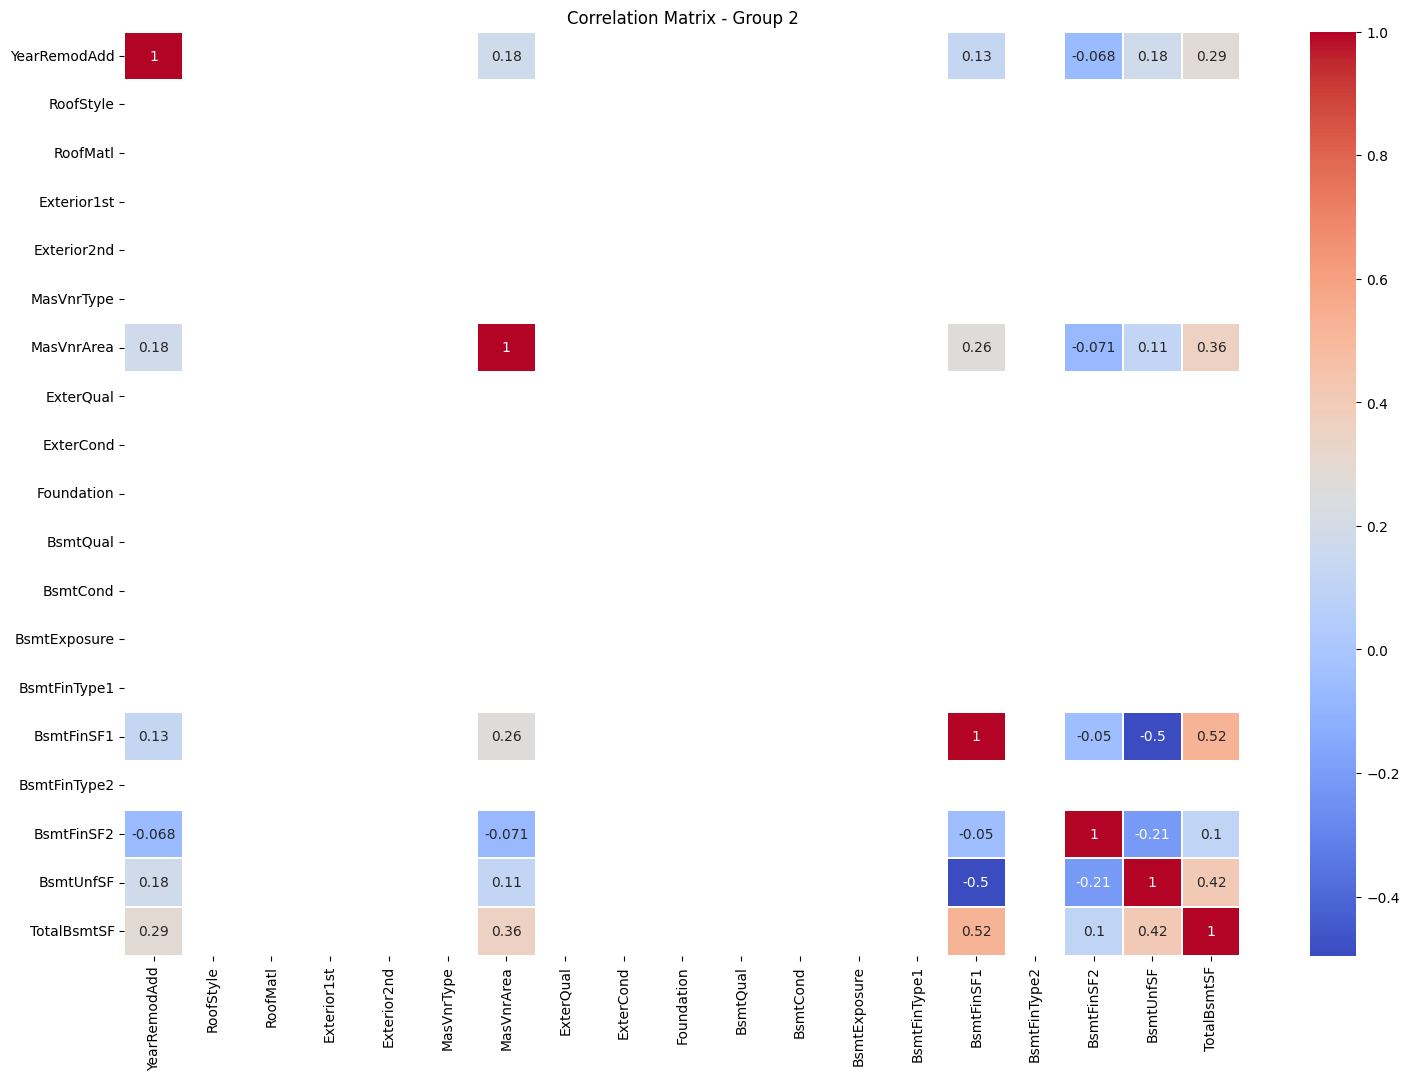

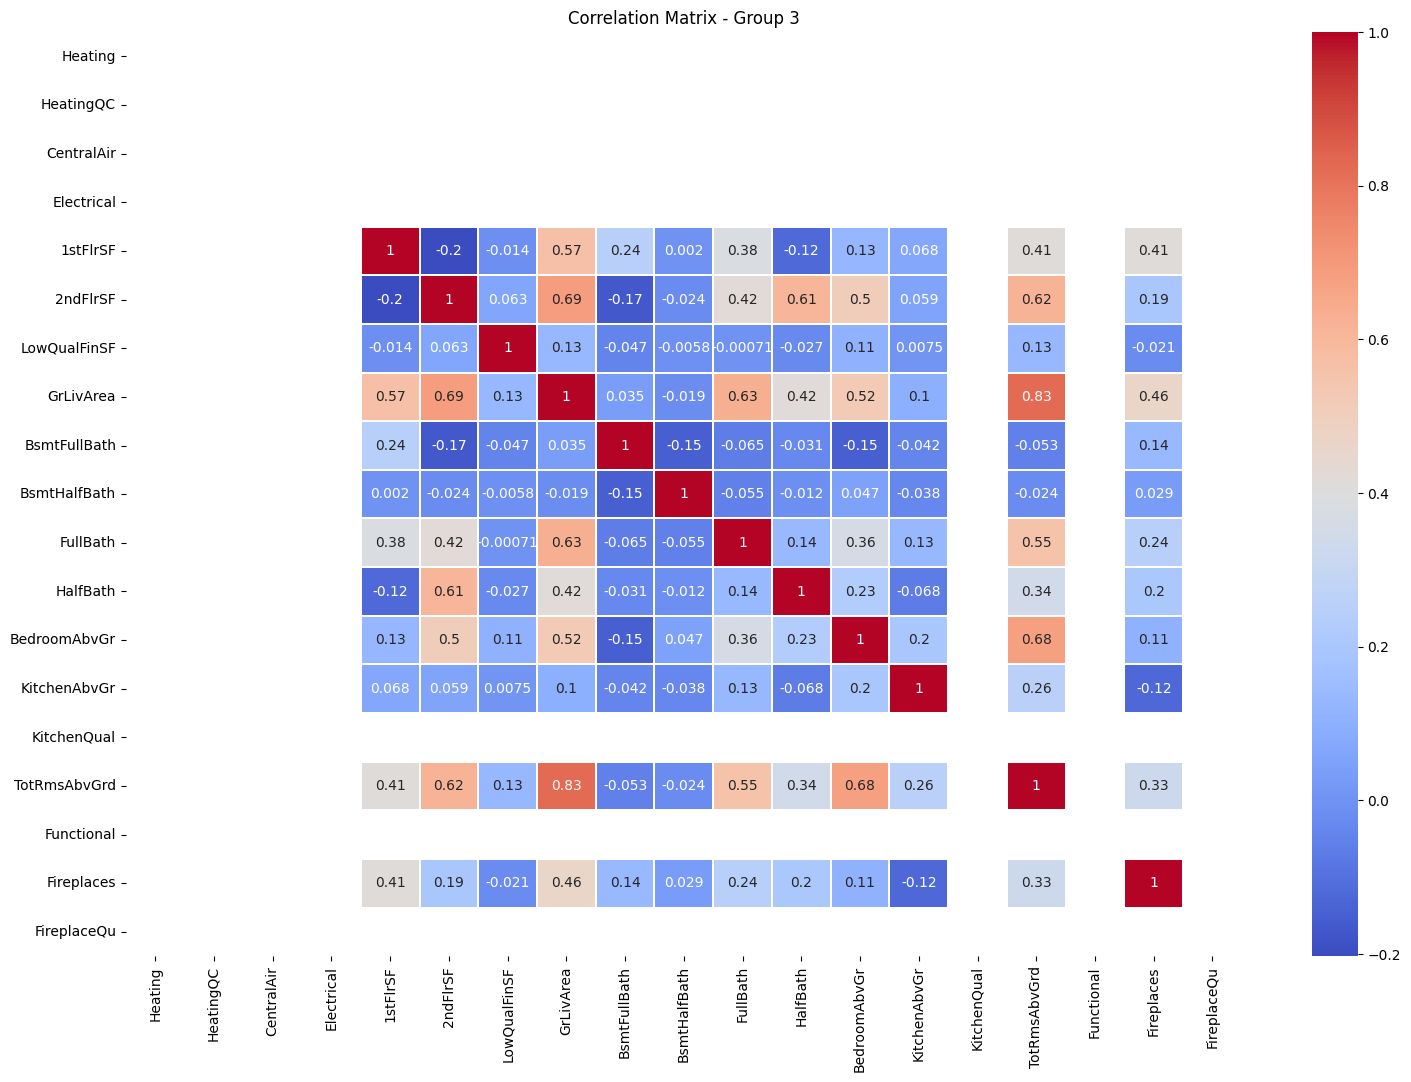

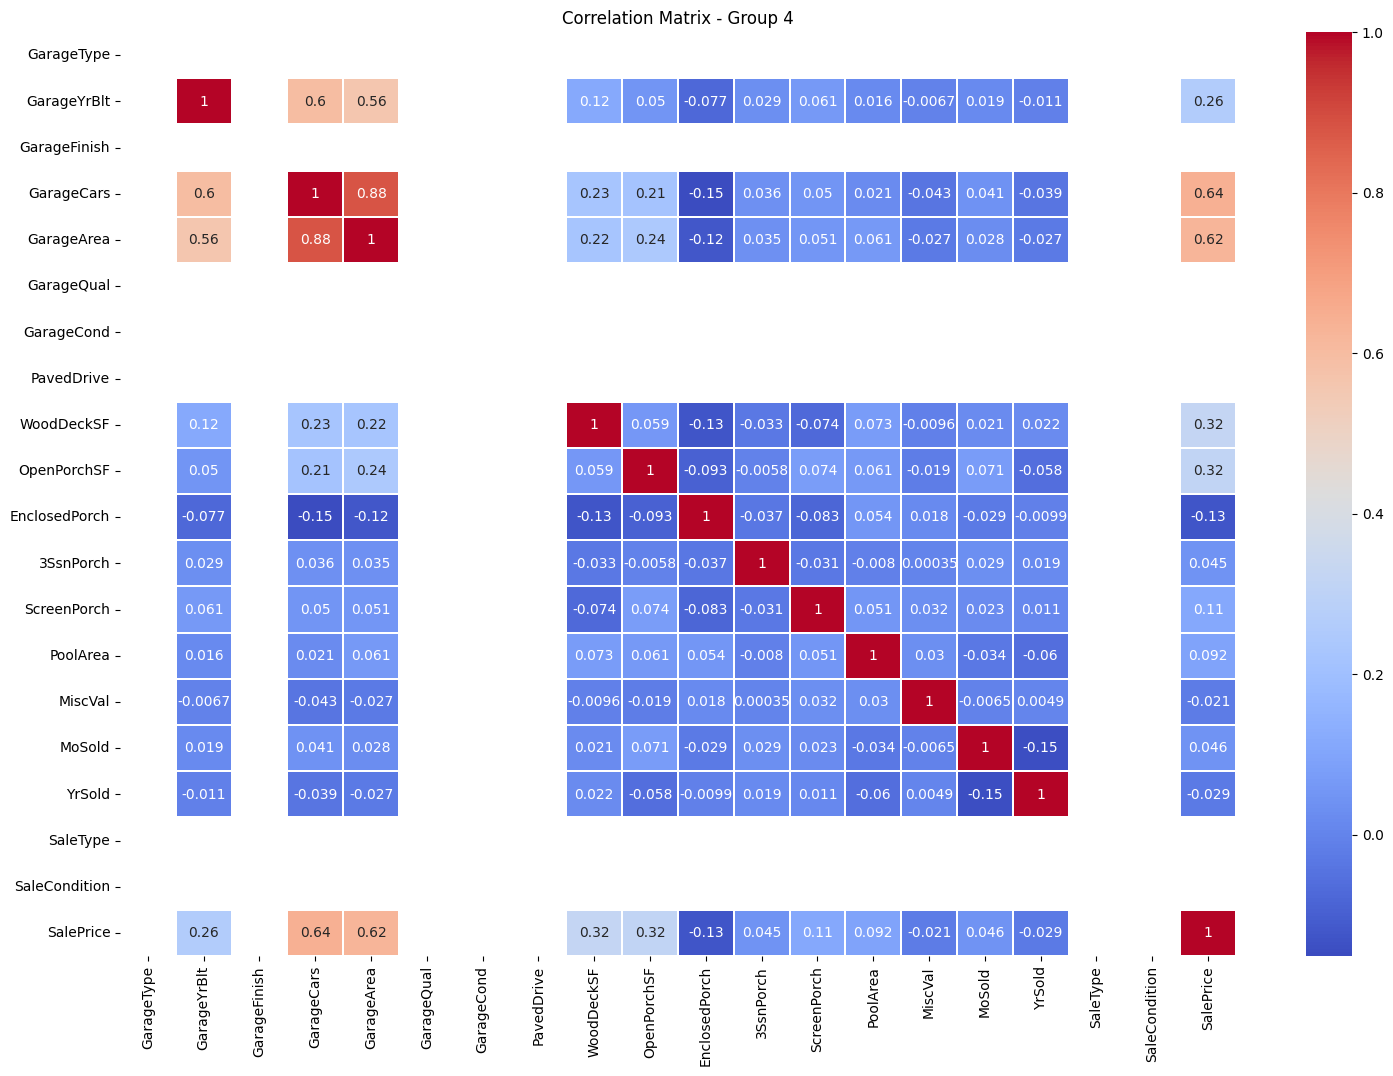

In [127]:
n = len(df.columns)
columns_group_1 = df.columns[:n//4]
columns_group_2 = df.columns[n//4:n//2]
columns_group_3 = df.columns[n//2:3*n//4]
columns_group_4 = df.columns[3*n//4:]

def plot_correlation_heatmap(df, columns, title):
    correlation_matrix = df[columns].corr()
    
    
    plt.figure(figsize=(18, 12)) 
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.1)
    plt.title(title)  
    plt.show()

plot_correlation_heatmap(df, columns_group_1, "Correlation Matrix - Group 1")
plot_correlation_heatmap(df, columns_group_2, "Correlation Matrix - Group 2")
plot_correlation_heatmap(df, columns_group_3, "Correlation Matrix - Group 3")
plot_correlation_heatmap(df, columns_group_4, "Correlation Matrix - Group 4")


Highly Correlated Column Pairs in this dataset 

In [128]:
corr_matrix = df.corr()
threshold = 0.8
high_corr_pairs = corr_matrix.unstack().reset_index()
high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

# Filter pairs with correlation above the threshold and avoid self-correlation (i.e., diagonal = 1)
high_corr_pairs = high_corr_pairs[
    (high_corr_pairs['Correlation'] > threshold) & 
    (high_corr_pairs['Feature1'] != high_corr_pairs['Feature2'])
].sort_values(by='Correlation', ascending=False)

print("Highly Correlated Pairs:")
print(high_corr_pairs)

Highly Correlated Pairs:
          Feature1      Feature2  Correlation
4681    GarageCars    GarageArea     0.882475
4757    GarageArea    GarageCars     0.882475
4126  TotRmsAbvGrd     GrLivArea     0.825489
3518     GrLivArea  TotRmsAbvGrd     0.825489
3271      1stFlrSF   TotalBsmtSF     0.819530
2891   TotalBsmtSF      1stFlrSF     0.819530


In [129]:
selected_columns = df[["GarageArea","GarageCars","Exterior2nd","Exterior1st","YearBuilt","GarageYrBlt"
         ,"GrLivArea","TotRmsAbvGrd","1stFlrSF","TotalBsmtSF"]]



Scatterplots of Numerical Columns VS the target variable

In [130]:
def plot_scatter_graph(df, x, y, color="red"):
    plt.scatter(x=df[x], y=df[y], color=color)

    plt.title(f'{x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    return print(plt.show())


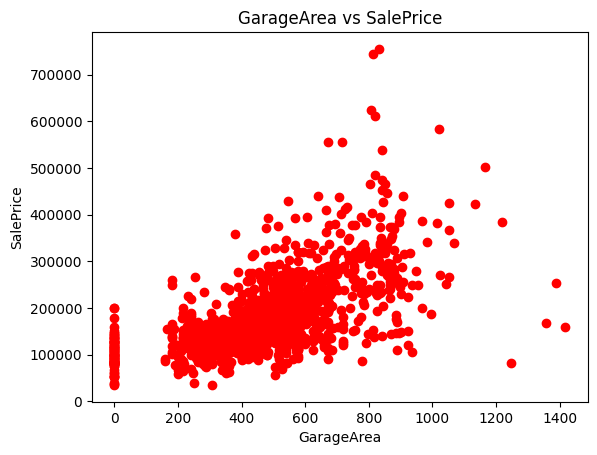

None


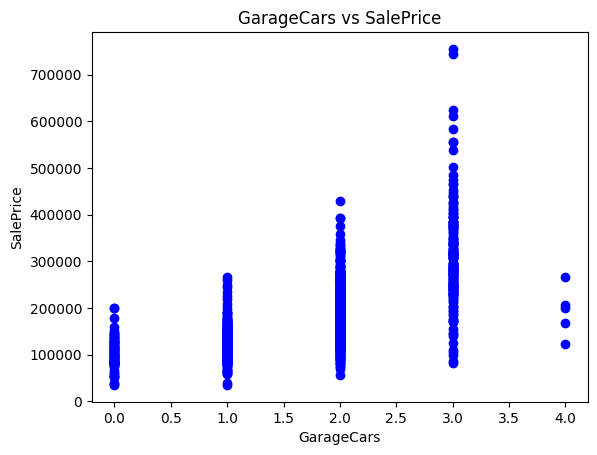

None


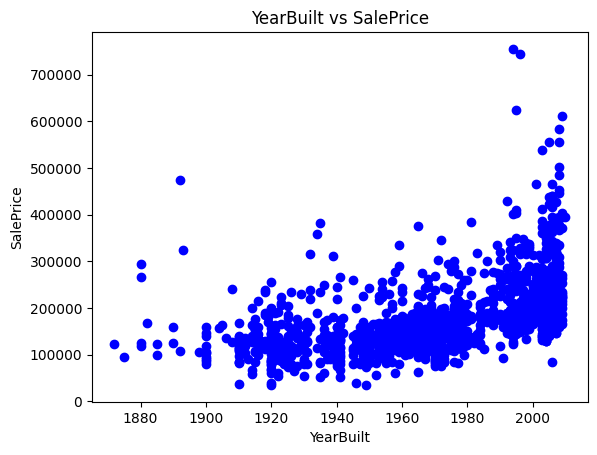

None


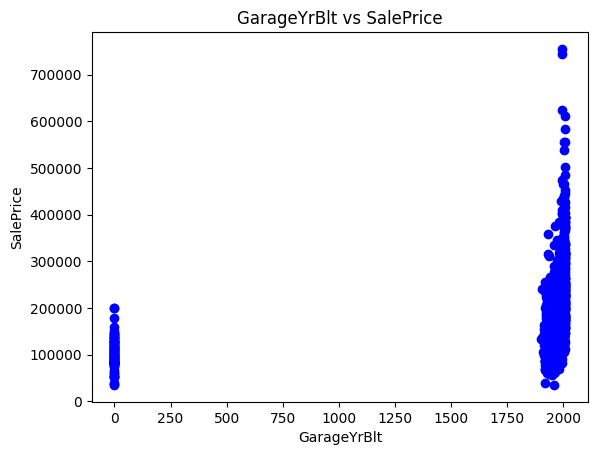

None


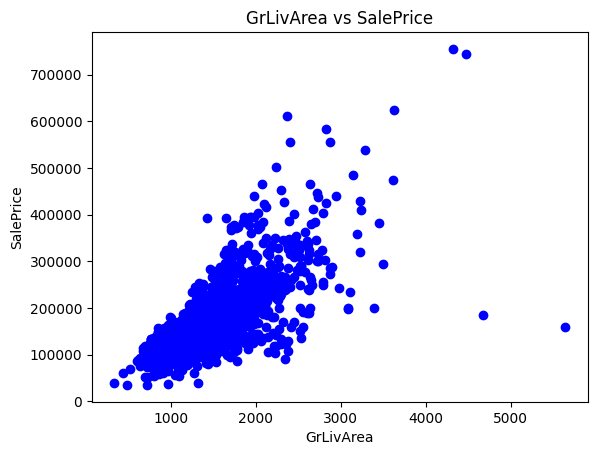

None


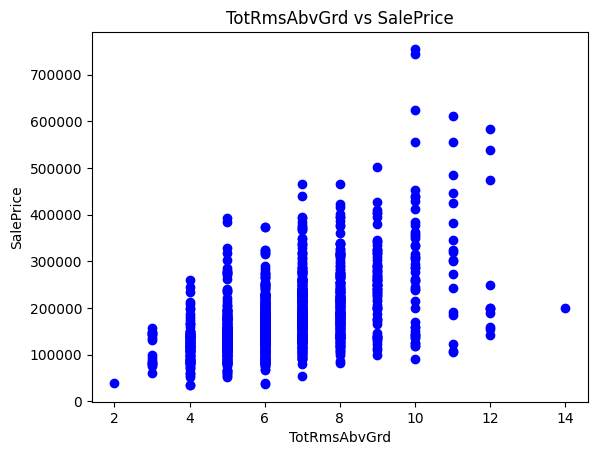

None


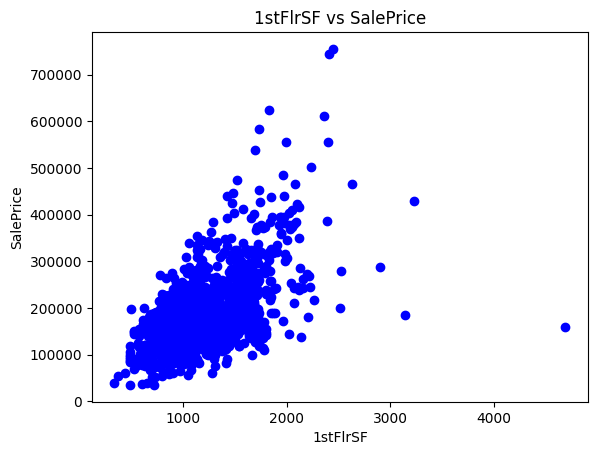

None


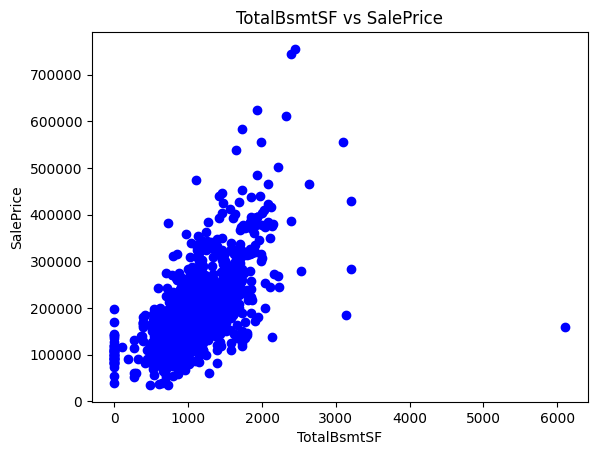

None


In [131]:
plot_scatter_graph(df,"GarageArea","SalePrice")
plot_scatter_graph(df,"GarageCars","SalePrice",color= "blue")
plot_scatter_graph(df,"YearBuilt","SalePrice",color= "blue")
plot_scatter_graph(df,"GarageYrBlt","SalePrice",color= "blue")
plot_scatter_graph(df,"GrLivArea","SalePrice",color= "blue")
plot_scatter_graph(df,"TotRmsAbvGrd","SalePrice",color= "blue")
plot_scatter_graph(df,"1stFlrSF","SalePrice",color= "blue")
plot_scatter_graph(df,"TotalBsmtSF","SalePrice",color= "blue")


In [132]:
mean_to = df["SalePrice"].mean()
print(f"Average Saleprice of house is {mean_to}")

Average Saleprice of house is 180921.19589041095


In [133]:

X = df.drop(columns=['SalePrice'])
y = df['SalePrice']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate evaluation metrics: Mean Squared Error and R² Score
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R² Score
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 1303007470.5599608
R² Score: 0.8301235911793376
